In [6]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8") # principlamente para mostrar tildes en las gráficas

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

# Normalidad de las distribuciones e igualdad de matriz de covarianza

Test de normalidad multivariante:

Setosa:
$multivariateNormality
             Test        Statistic           p value Result
1 Mardia Skewness 25.6643445196298 0.177185884467652    YES
2 Mardia Kurtosis 1.29499223711605 0.195322907441935    YES
3             MVN             <NA>              <NA>    YES

$univariateNormality
              Test     Variable Statistic   p value Normality
1 Anderson-Darling Sepal.Length    0.4080  0.3352      YES   
2 Anderson-Darling Sepal.Width     0.4910  0.2102      YES   
3 Anderson-Darling Petal.Length    1.0073  0.0108      NO    
4 Anderson-Darling Petal.Width     4.7148  <0.001      NO    

$Descriptives
              n  Mean   Std.Dev Median Min Max 25th  75th       Skew   Kurtosis
Sepal.Length 50 5.006 0.3524897    5.0 4.3 5.8  4.8 5.200 0.11297784 -0.4508724
Sepal.Width  50 3.428 0.3790644    3.4 2.3 4.4  3.2 3.675 0.03872946  0.5959507
Petal.Length 50 1.462 0.1736640    1.5 1.0 1.9  1.4 1.575 0.10009538  0.6539303
Petal.Width  50 0.246 0.105

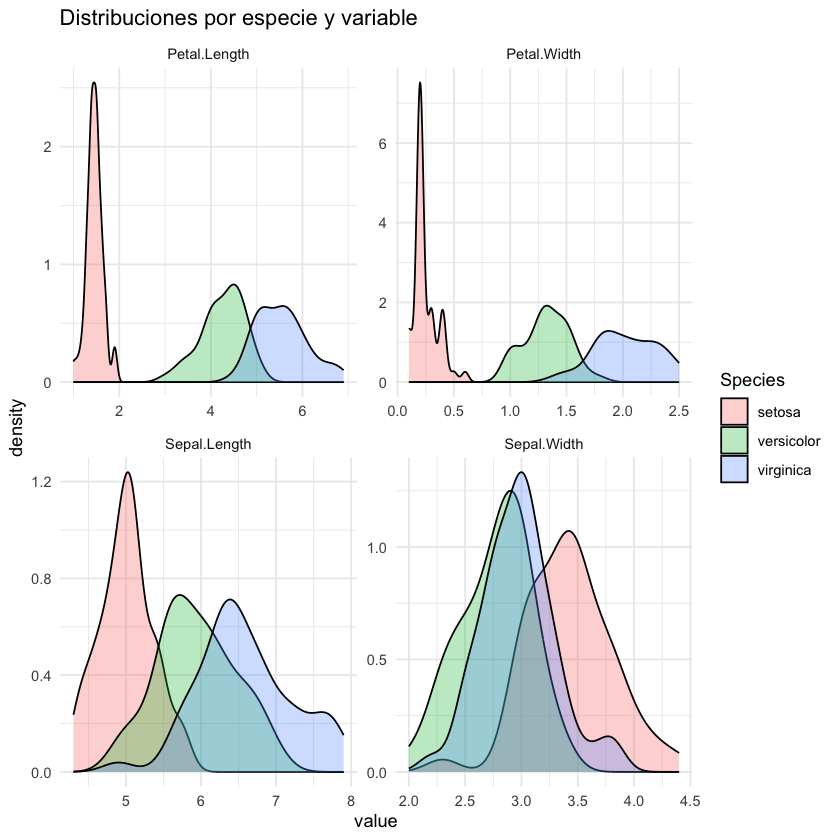

In [7]:
# Cargar librerías necesarias
library(MVN)
library(ggplot2)
library(tidyr)

# Separar datos por especies
setosa <- iris[iris$Species == "setosa", 1:4]
versicolor <- iris[iris$Species == "versicolor", 1:4]
virginica <- iris[iris$Species == "virginica", 1:4]

# Test de normalidad multivariante para cada clase
cat("Test de normalidad multivariante:\n")
cat("\nSetosa:\n")
print(mvn(setosa, mvnTest = "mardia"))
cat("\nVersicolor:\n")
print(mvn(versicolor, mvnTest = "mardia"))
cat("\nVirginica:\n")
print(mvn(virginica, mvnTest = "mardia"))

# Comparar matrices de covarianza manualmente
cat("\nMatrices de covarianza:\n")
cat("\nSetosa:\n")
print(round(cov(setosa), 3))
cat("\nVersicolor:\n")
print(round(cov(versicolor), 3))
cat("\nVirginica:\n")
print(round(cov(virginica), 3))

# Visualizar distribuciones
iris_long <- gather(iris[,1:5], key = "variable", value = "value", -Species)

ggplot(iris_long, aes(x = value, fill = Species)) +
  geom_density(alpha = 0.3) +
  facet_wrap(~variable, scales = "free") +
  theme_minimal() +
  ggtitle("Distribuciones por especie y variable")

# Modelos lineales de clasificación 

En esta sesión de práctica revisaremos el problema de clasificación y veremos como ajustar modelos lineales de clasificación con R. Recordamos que en un problema de clasificación se dispone de un conjunt ode observaciones que pueden venir de dos o más poblaciones o clases distintas. El objetivo es clasificar una nueva observación a partir de un conjunto de variables predictores $\mathbf{X} = (X_1, \dots, X_p)$. Para ello contamos con la información de la muestra de entrenamiento, que consiste en observaciones de las variables predictoras junto con la clasificación correspondiente a cada observación. 

En la primera parte de esta práctica comentaremos brevemente como ajustar con R un modelo de regresión logística

## Regresión logística

In [8]:
# install.packages("ISLR")
library(ISLR)
data(Default)
head(Default)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


Este conjunto de datos contiene información simulada de 10000 clientes de una entidad bancaria. El objetivo es predecir cuando un cliente incurrirá en impago de crédito de la tarjeta. Para ello podemos utilizar la información correspondiente al saldo medio mensual del cliente.

Si representamos los datos, parece razonable pensar que el saldo medio mensual puede influir en la probabilidad de que un cliente incurra en imago de crédito de la tarjeta. Veremos como ajustar un modelo de regresión logística para estudiar esa posible relación. Es decir, supondremos:
\begin{equation}
p(X) = \mathbb{P} (Y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
\end{equation}

donde $X$ representa el saldo mensual del cliente e
\begin{equation}
Y = \left\{
\begin{array}{ll}
1, & \text{si el cliente incurre en impago} \\
0, & \text{si el cliente no incurre en impago}
\end{array}\right.
\end{equation}

In [9]:
default01 <- numeric()
default01[Default$default=="No"] = 0
default01[Default$default=="Yes"] = 1

Si aplicamos la regresión lineal clásica, tendremos un problema

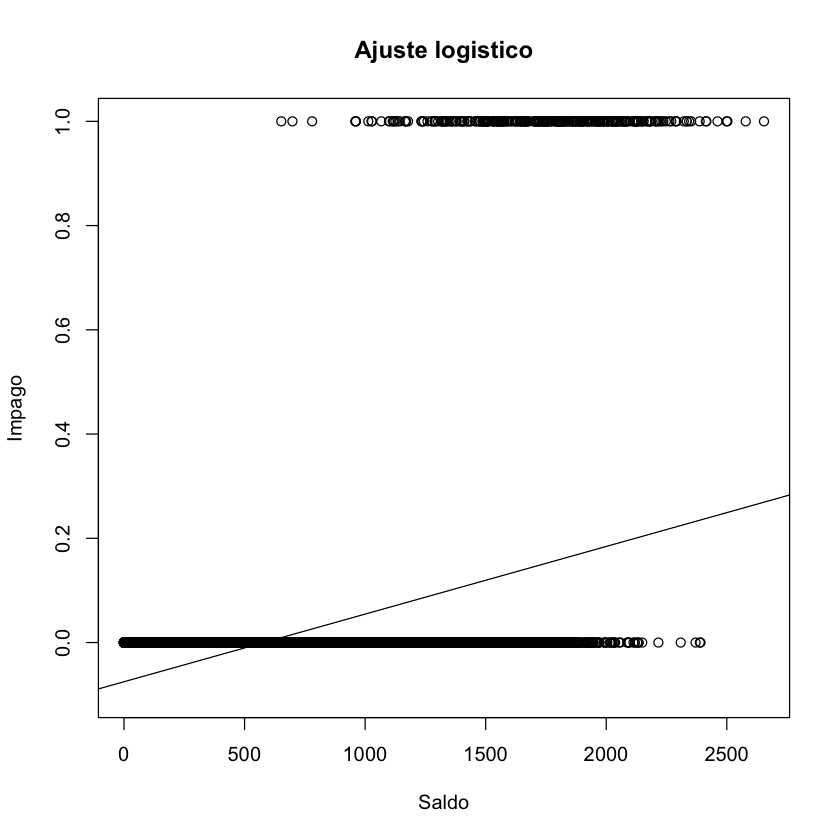

In [10]:
reglin <- lm(default01 ~ Default$balance)
plot(Default$balance, default01, main = "Ajuste logistico", 
     xlab = "Saldo", ylab = "Impago", ylim = c(-0.1, 1)) # pinta los datos
abline(reglin) # pinta la recta de regresion 

El modelo de regresión logística se ajusta en R utilizando el comando `glm` (*general lineal models*). Los modelos lineales generalizados son una extensión de los modelos lineales que permiten que la variable dependiente tenga una distribución no normal. La formulación de modelos lineales generalizados permite unificar en un mismo modelo métodos de como la regresión lineal y la regresión logística, sin más que especificar la función *link* o familia de distribución de los errores correspondientes a cada caso. 

Por ejemplo, la regresión logística se puede formular como un modelo lineal generalizado en el que la distribución de los errores es binomial `(family = "binomial")`

In [11]:
fit <- glm(default ~ balance, data = Default, family = "binomial")
# as.data.frame(x) si hay que convertir los datos a dataframe
summary(fit)


Call:
glm(formula = default ~ balance, family = "binomial", data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [12]:
# Coeficientes
fit$coefficients

(Intercept)       balance 
-10.651330614   0.005498917

In [13]:
# Odds (de alguien con saldo medio cero)
odds=exp(fit$coefficients[1])
odds
# Probabilidad de que no incurra en impago
odds/(1+odds)

# Por cada unidad monetaria, la odds de impago 
# se multiplica por exp(beta1)
odds1=exp(fit$coefficients[2])
saldo=1000
odds1000=odds*odds1**saldo
odds1000/(1+odds1000)

(Intercept) 
2.366933e-05

(Intercept) 
2.366877e-05

(Intercept) 
0.005752145

In [14]:
# La frontera entre clasificar como default o no, estara en el valor
# de x que satisface
# beta_0 + beta_1 X = 0
front = -fit$coefficients[1]/fit$coefficients[2]
front
oddsfront = odds*odds1^front
oddsfront/(1+oddsfront)

(Intercept) 
   1936.987

(Intercept) 
        0.5

Al igual que se hacía en el análisis de regresión lineal, podremos utilizar las funciones `coef`, `summary`, `residuals`, etc, para obtener información relacionada con el ajuste del modelo. También se puede usar la función `predict` para obtener las predicciones del modelo. Si queremos obtener las predicciones para $\mathbb{P} (Y = 1 | X)$, debemos añadir el argumento `type = "response"`. Así (dos tipos de forma de plotear el ajuste):

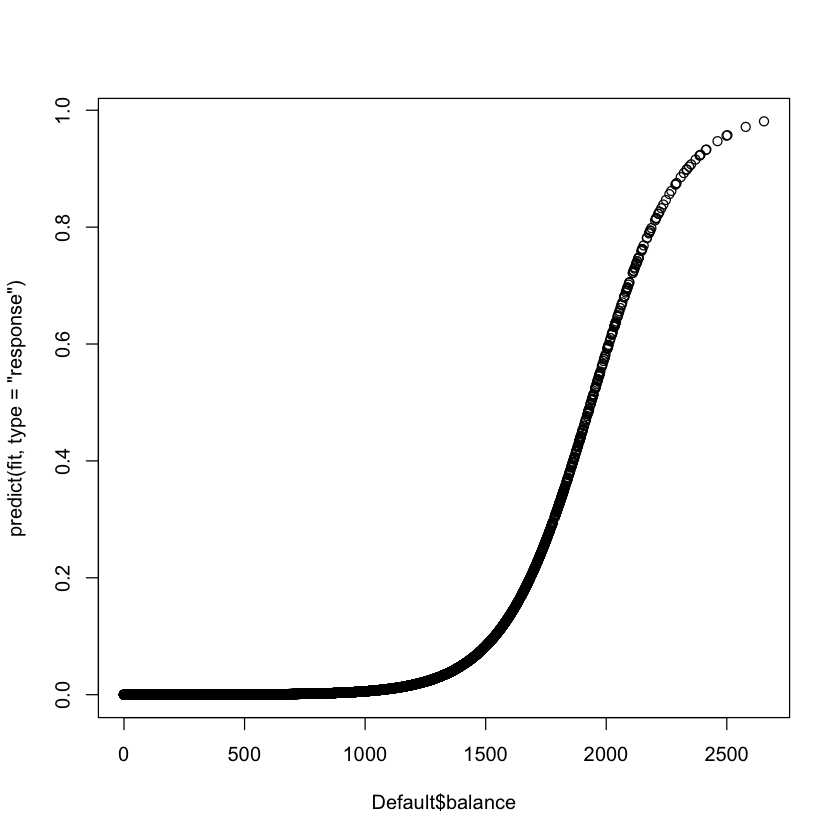

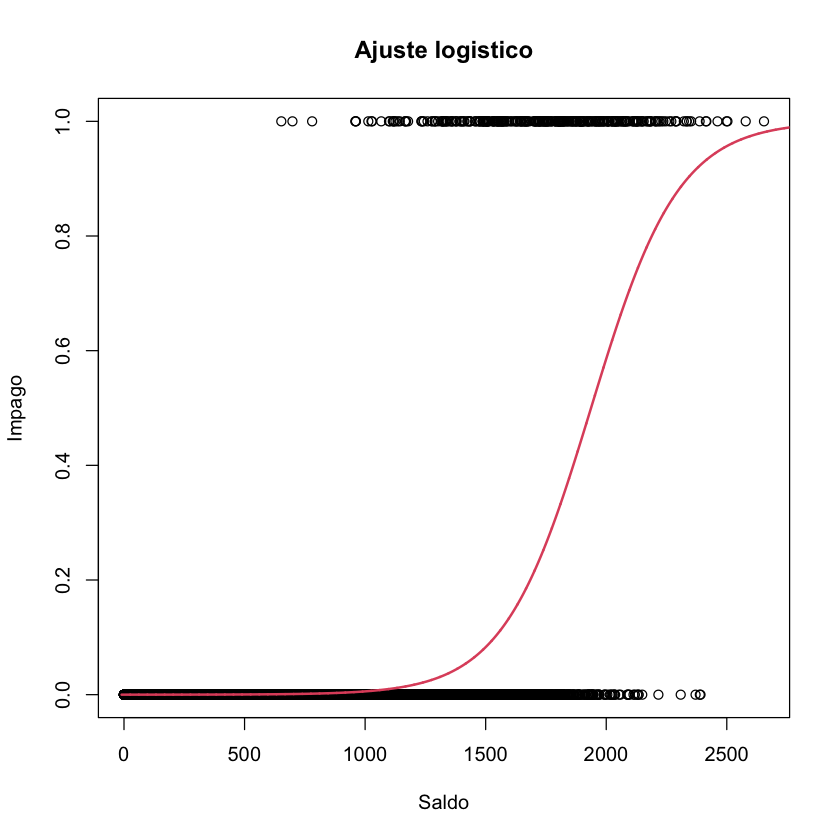

In [15]:
plot(Default$balance, predict(fit, type = "response"))

plot(Default$balance, default01, main = "Ajuste logistico", 
     xlab = "Saldo", ylab = "Impago")

seqx = seq(-10, 2800, len = 10000)
seqy = predict(fit, list(balance = seqx), type = "response")

lines(seqx, seqy, col = 2, lwd = 2)

representa gráficamente las predicciones del modelo para los valores de $X$ de la muestra de entrenamiento. Clasificaremos en el grupo de impago a aquellos clientes para los cuales la predicción obtenida para $\mathbb{P} (Y = 1 | X)$ sea superior a 0.5. Predecimos la probabilidad de *default* acorde a su saldo medio

In [18]:
probdef <- predict(fit, type = "response")
pred_clases <- ifelse(probdef > 0.5, "Yes", "No")

Comparamos ahora la realidad con nuestras predicciones mediante una matriz de confusión

In [19]:
# Evaluar el modelo con una tabla de contingencia
table(Predicted = pred_clases, Actual = Default$default)

         Actual
Predicted   No  Yes
      No  9625  233
      Yes   42  100

## k-vecinos más próximos

Ilustraremos el problema de clasificación con el conjunto clásico de datos de Iris. Este conjunto nos da la medida en cm de las variables longitud y anchura de sépalo y longitud y anchura de pétalo para un total de 150 flores de tres especies diferentes de iris (iris setosa, versicolor y virginica).

Para comenzar nos centraremos en las variables longitud y anchura de pétalo. Ya sabemos como representar gráficamente los datos correspondientes a estas variables

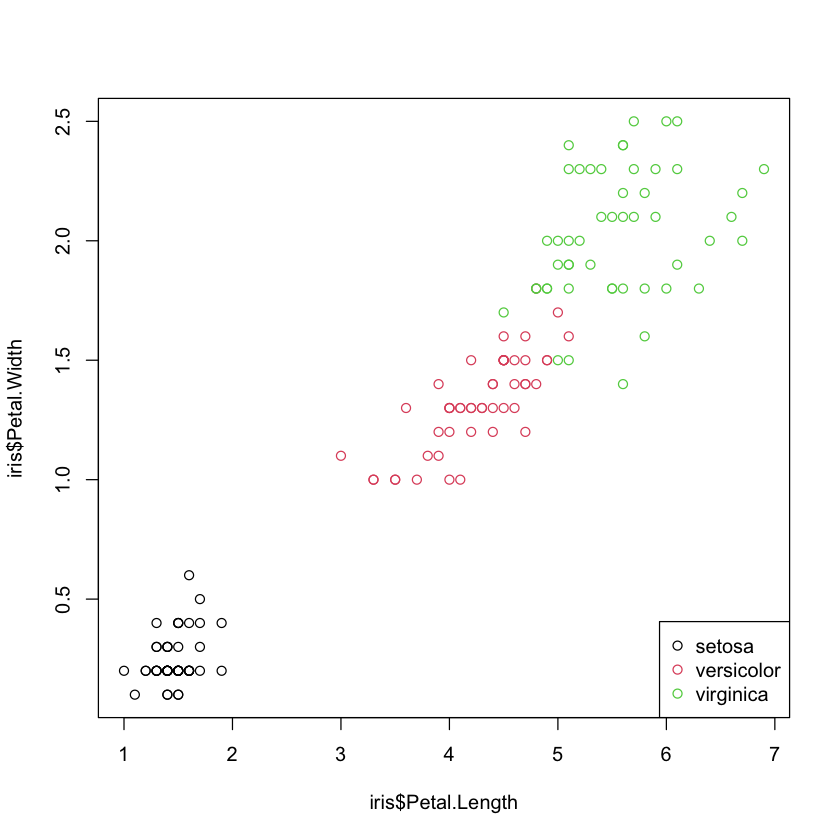

In [45]:
data(iris)
plot(iris$Petal.Length,iris$Petal.Width, col=iris$Species)
legend("bottomright", levels(iris$Species), col = 1:3, pch = 1)

Para llevar a cabo k-vecinos más próximos en R utilizaremos la función `knn`, que pertenece a la librería `class`. 

Utilizando la distancia euclídea clasificaremos a una nueva observación en función de los $k$ puntos que están más cerca de él. Podríamos ver que $k = 4$ puntos quedan más cerca del punto que tiene un `Petal.Length = 4` y un `Petal.Width = 1`. Si añadimos el argumento `prob = TRUE` también nos devolverá la probabilidad de pertenecer a cada grupo. 

In [46]:
library(class)
matexp <- cbind(iris$Petal.Length, iris$Petal.Width)
vecres <- iris$Species
knn.pred <- knn(train = matexp, test = c(4, 1), cl = iris$Species, k = 4, prob = TRUE)
knn.pred

[1] versicolor
attr(,"prob")
[1] 1
Levels: setosa versicolor virginica

En este caso, vemos que a esa nueva planta la clasificaría como versicolor con una probabilidad de 1 (sus 4 vecinos más próximos también son versicolor). Vamos a hacer predicciones sobre los propios datos, es decir, entrenamiento = *test*. Si tomamos $k = 1$, 

In [47]:
knn.pred <- knn(train = matexp, test = matexp, cl = vecres, k = 1)

Si comparamos con la realidad, 

In [48]:
table(knn.pred,vecres)

            vecres
knn.pred     setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         0
  virginica       0          1        50

La predicción debió ser perfecta; veamos cuál falló 

In [49]:
which(knn.pred != vecres)

[1] 71

En este caso, la predicción no es perfecta porque hay tres plantas con las mismas explicativas:

In [50]:
which((matexp[,1] == 4.8) & (matexp[,2] == 1.8))
vecres[which((matexp[,1] == 4.8) & (matexp[,2] == 1.8))]

[1]  71 127 139

[1] versicolor virginica  virginica 
Levels: setosa versicolor virginica

Para ver las probabilidades asociadas, basta con usar `knn.predb`

In [51]:
knn.predb <- knn(matexp,matexp,cl=vecres,k=1,prob=T)
attr(knn.predb, "prob")

[1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
  [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [29] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [50] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [57] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [64] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [71] 0.6666667 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [78] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [85] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [92] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [99] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[106] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[113] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[120] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[127] 0.6666667 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[134] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[141] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[148] 1.0000000 1.0000000 1.0000000

Si extendemos el análisis a los 10 vecinos más próximos ($k = 10$)

In [52]:
set.seed (1)
knn.pred2 <- knn(matexp, matexp, cl = vecres, k = 10)
table(knn.pred2, vecres)

            vecres
knn.pred2    setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         3
  virginica       0          3        47

Por último, representamos la frontera de decisión

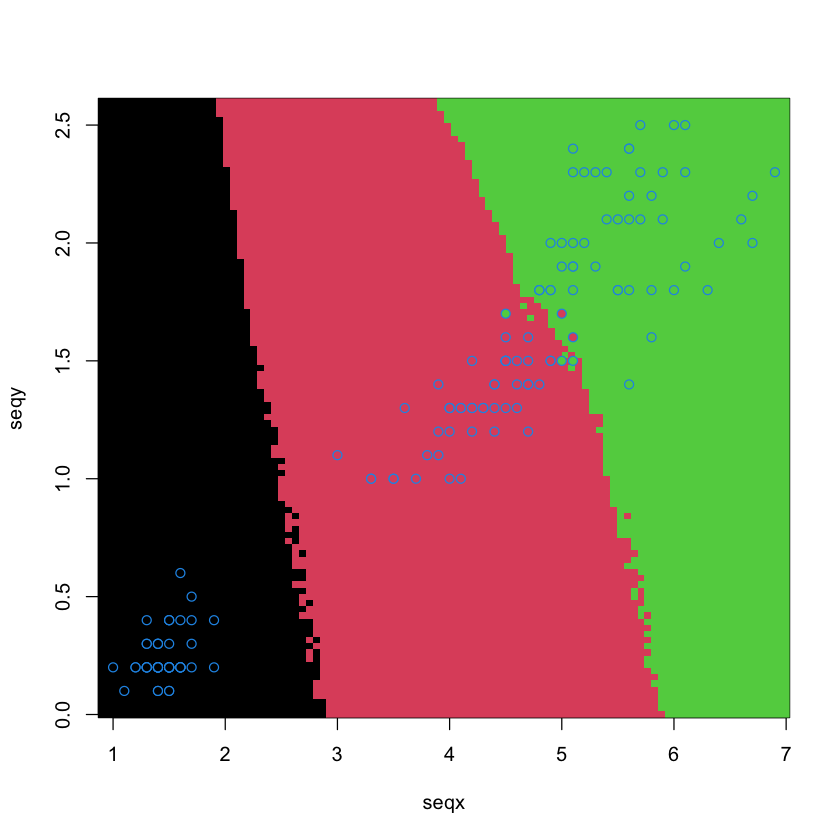

In [53]:
seqx <- seq(0.9, 7, len = 100)
seqy <- seq(0, 2.6, len = 100)
rejbid <- expand.grid(x = seqx, y = seqy)
knn.pred3 <- knn(matexp, rejbid, cl = vecres, k = 10)
image(seqx, seqy, matrix(as.double(knn.pred3), nrow = 100), col = 1:3)
points(iris$Petal.Length, iris$Petal.Width, bg = iris$Species, col = 4, pch = 21)

## Análisis Lineal Discriminante (LDA)

Para llevar a cabo un LDA en R utilizaremos la función `lda`, que pertenece a la librería `MASS`. 

In [54]:
library(MASS)
lda.fit <- lda(Species ~ Petal.Length + Petal.Width, data = iris)

Recuerda que el LDA es un modelo generativo, es decir, calcula la probabilidad *a posteriori* $\mathbb{P} (Y = k | X = x)$ mediante el teorema de Bayes:
\begin{equation}
\mathbb{P} (Y = k | X = x) = \frac{\mathbb{P}(X = x | Y = k) \mathbb{P}(Y = k)}{\mathbb{P}(X = x)} = \frac{f_k (x)\pi_k}{\sum_{j = 1}^K f_j(x) \pi_j}
\end{equation}

donde $\pi_k = \mathbb{P}(Y = k)$ denota la probabilidad *a priori* de que una observación provenga de la clase $k$ y $f_k (x) = \mathbb{P} (X = x | Y = k)$ representa la densidad de probabilidad de $X$ en la clase $k$. 

**En LDA se asume además que las funciones de densidad de probabilidad de cada clase $f_k (x)$ son distribuciones normales de media $\mu_k$ y con la misma matriz de covarianzas $\Sigma$ para $k = 1, \dots K$.** Una vez calculadas las probabilidades *a posteriori*, la regla de clasificación consiste en asignar cada observación a la clase par ala cual $\mathbb{P} (Y = k | X = x)$ es mayor. 

En la práctica, para llevar a cabo la clasificación, tendremos que estimar las probabilidades *a priori* $\pi_k$, así como los parámetros de la densidad de probabilidad normal correspondiente a cada clase. 

La salida de la función `lda` nos muestra, entre otras cosas, las estimaciones de $\pi_k$. En este caso, 

In [55]:
lda.fit$prior
# se calcula con proporciones muestrales
table(iris$Species)/length(iris$Species)

setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333


    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Es decir, como en este caso hay 50 observaciones dentro de cada especie, se tiene que $1/3$ de las observaciones pertenece a la especie setosa, $1/3$ de las observaciones pertenecen a la especie versicolor y $1/3$ de las observaciones pertenecen a la especia virgínica ($\hat{\pi}_k = 1/3$, $k = 1, 2, 3$). 

También se muestran en la salida la longitud y anchura de pétalo media de cada especie (estimaciones de $\mu_k$):

In [56]:
lda.fit$means

,Petal.Length,Petal.Width
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


La predicción se lleva a cabo como es habitual con la función `predict`. A continuación evaluamos la función `predict` en la muestra de entrenamiento

In [57]:
lda.pred <- predict(lda.fit)

Observa que en `lda.pred$class` se indica la especie asignada a cada observación por la regla de clasificación.

In [58]:
lda.pred$class

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  versicolor
 [73] versicolor versicolor versicolor versicolor versicolor virginica 
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  versicolor virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  versicolor
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  versicolor versicolor virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

Por otro lado, en `lda.pred$posterior` se muestra, para cada observación, el valor estimado para la probabilidad *a posteriori* de cada especie

In [59]:
lda.pred$posterior

,setosa,versicolor,virginica
1,1,8.750491e-12,4.742801e-26
2,1,8.750491e-12,4.742801e-26
3,1,2.640992e-12,9.514213e-27
4,1,2.899331e-11,2.364269e-25
5,1,8.750491e-12,4.742801e-26
6,1,4.815647e-09,1.094346e-21
7,1,3.403655e-11,6.472943e-25
8,1,2.899331e-11,2.364269e-25
9,1,8.750491e-12,4.742801e-26
10,1,7.453919e-12,1.732328e-26


A continuación se muestra un resumen del resultado de la clasificación en la muestra de entrenamiento. Observa que todas las flores de la especie setosa han sido correctamente clasificadas, se han conmetido 4 errores de clasificación en las de la especie versicolor y 2 errores de clasificación en las de la especie virgínica. En resumen, tenemos una tasa de error de 0.04.

In [60]:
table(lda.pred$class, iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         4
  virginica       0          2        46

Debemos recordar que la regla de decisión que determina el LDA se basa en la suposición de la normalidad de las observacines y en la de que las matrices de covarianzas en las clases son iguales. Si mantenemos que la densidad de probabilidad de cada clase es normal pero no podemos asumir la igualdad de las matrices de covarianzas, entonces la regla de decisión deja de dar lugar a un modelo de clasificación lineal. Estaremos en este caso ante un Análisis Cuadrático Discriminante (QDA). Para llevar a cabo un QDA en R utilizaremos la función `qda`, que pertenece a la librería `MASS`. 

Por último, como en el ejemplo que hemos utilizado a lo largo de este sección teníamos únicamente dos variables predictores, podríamos visualizar las regiones determinadas por la regla de decisión. Para ello usaremos la librería `klaR`, que también nos permite llevar a cabo un LDA y ofrece más herramientas de visualización. Visualizamos al mismo tiempo los resultados de un QDA

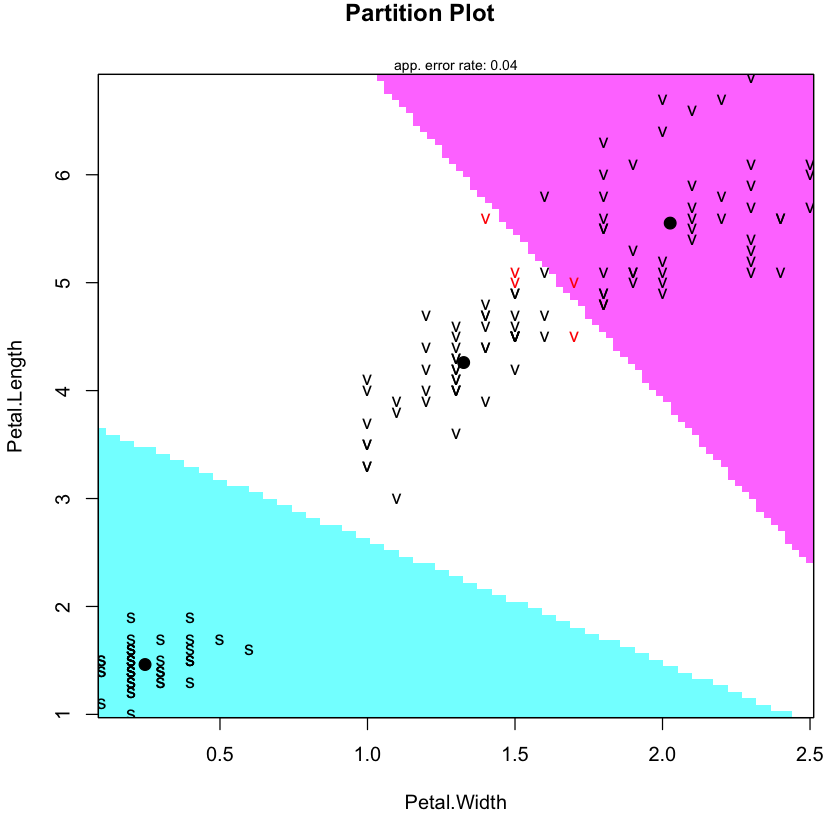

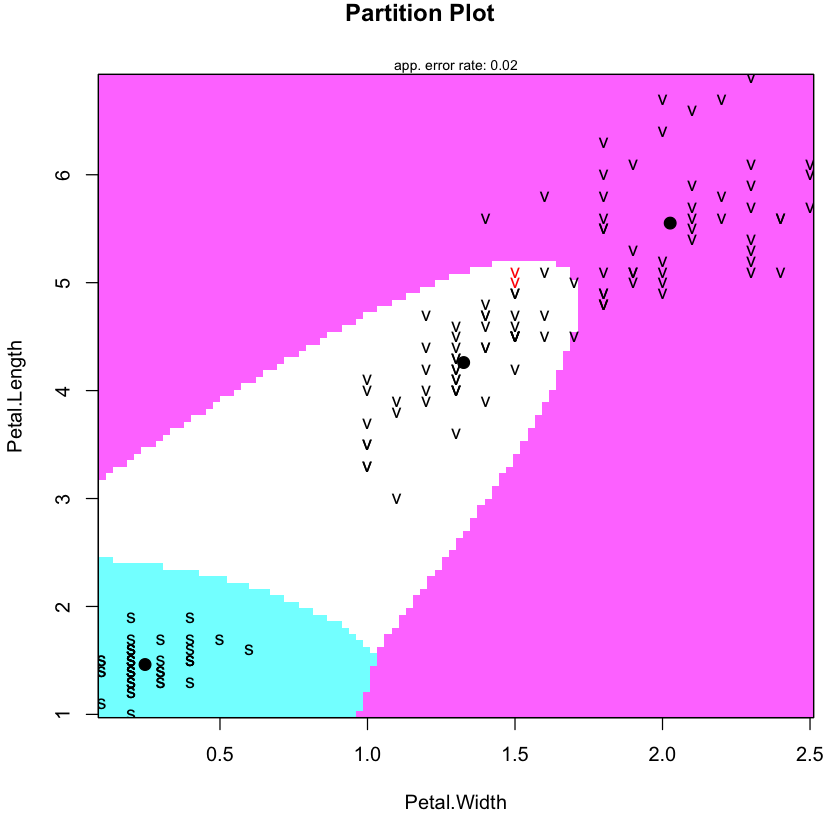

In [61]:
# install.packages('klaR')
library(klaR)
partimat(Species ~ Petal.Length + Petal.Width, data = iris, method = "lda")
partimat(Species ~ Petal.Length + Petal.Width, data = iris, method = "qda")

En el gráfico se observa que las fronteras de las tres zonas de clasificación con LDA están delimitadas por rectas (es un modelo de clasificación lineal). También podemos ver señaladas en rojo las 4 observaciones de la muestra de entrenamiento que han resultado mal clasificadas con LDA. 

Podemos hacer predicciones con otro conjunto distinto al de entrenamiento.

In [62]:
newd <- data.frame(Petal.Length = c(1.26905, 5), Petal.Width = c(2.19,2))
lda.pred2 <- predict(lda.fit, newdata = newd)

La probabilidad de pertenecer a cada clase ahora es

In [63]:
lda.pred2$posterior

,setosa,versicolor,virginica
1,4.999351e-01,0.49995289,0.0001119929
2,5.914126e-21,0.01153218,0.9884678189


Clase en la que clasifican a estas nuevas observaciones

In [64]:
lda.pred2$class

[1] versicolor virginica 
Levels: setosa versicolor virginica

Si solo se quisiera dar clasificación de aquellas que excedan una probabilidad de 0.5. Veríamos que la segunda la clasificamos con virgínicas, pero la primera queda sin clasificar

In [65]:
lda.pred2$posterior>0.5

,setosa,versicolor,virginica
1,FALSE,FALSE,FALSE
2,FALSE,FALSE,TRUE


Podemos comparar los resultados con la realidad

In [ ]:
table(lda.pred$class, iris$Species)

# porcentaje de mal clasificados
cat("Porcentaje de mal clasificados:", (4+2)/1.5)
mean(lda.pred2$class != iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         4
  virginica       0          2        46

Porcentaje de mal clasificados: 4

[1] 0.6666667

Si utilizásemos como criterio que la probabilidad *a posteriori* sea mayor que 0.9, se clasifican 138

In [ ]:
sum(lda.pred2$posterior>0.9)

# las observaciones que se clasifican son
obsclas <- rowSums(lda.pred$posterior>0.9)

# comparamos con la realidad
table(lda.pred$class[obsclas == 1], iris$Species[obsclas == 1])

[1] 1

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         46         0
  virginica       0          0        42

## QDA

Aquí solo se asumen distirbuciones de probabilidad de clases normales

In [76]:
qda.fit <- qda(Species ~ Petal.Length + Petal.Width, data = iris)

# prediccion para los valores observados
qda.pred <- predict(qda.fit)

# comparamos con la realidad
table(qda.pred$class, iris$Species)

# en este caso, el analisis predictivo es mejor
mean(qda.pred$class != iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         2
  virginica       0          1        48

[1] 0.02

### Repite los métodos de clasificación, k-vecinos más próximos, el LDA y el QDA para los datos de iris utilizando todas las variables predictoras disponibles en el conjunto de datos y analiza los resultados obtenidos. 